In [1]:
"""
A network with an inhomogeneous weight structure (anisotropic network)

This example contains a reservoir network of 4500 neurons, distributed over 2 Loihi chips.
3600 neurons are excitatory and 900 neurons are inhibitory.
The neurons are locally connected with a gaussian distribution on a 2-dimensional grid of neurons.
Edges are connected to form a torus shape.
The gaussian distribution is shifted, where the shift direction is drawn by perlin noise.

The network activity is started with a short cue input and then maintained.
After some time the network activity is stopped using a snip.
The next trial is started with a short cue input again,
which is slightly different (noisy) than the one before.

Using linear regression, a function is trained from the trials (using all but the last).
Finally the spiking activity of the last trial is used to predict the function,
using the weights trained with the other trials.

The experiment is defined in 'pelenet/experiments/readoutanisotropic.py' file.
A log file, parameters, and plot figures are stored in the 'log' folder for every run of the simulation.

NOTE: The main README file contains some more information about the structure of pelenet
"""

# Load pelenet modules
from pelenet.utils import Utils
from pelenet.experiments.readoutanisotropic import AnisotropicReadoutExperiment

# Official modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/readoutanisotropic.py)
parameters = {
    # Experiment
    'seed': 3,  # Random seed
    'trials': 25,  # Number of trials
    'stepsPerTrial': 110,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 10.24,  # Voltage time constant
    'currentTau': 10.78,  # Current time constant
    'thresholdMant': 1000,  # Spiking threshold for membrane potential
    'reservoirConnProb': 0.05,
    # Anisotropic
    'anisoStdE': 12,  # Space constant, std of gaussian for excitatory neurons
    'anisoStdI': 9,  # Space constant, std of gaussian for inhibitory neurons (range 9 - 11)
    'anisoShift': 1,  # Intensity of the shift of the connectivity distribution for a neuron
    #'percShift': 1,  # Percentage of shift (default 1)
    'anisoPerlinScale': 4,  # Perlin noise scale, high value => dense valleys, low value => broad valleys
    'weightExCoefficient': 12,  # Coefficient for excitatory anisotropic weight
    'weightInCoefficient': 48,  # Coefficient for inhibitory anisotropic weight
    # Input
    'inputIsTopology': True,  # Activate a 2D input area
    'inputIsLeaveOut': True,  # Leaves one target neuron out per trial
    'patchNeuronsShiftX': 44,  # x-position of the input area
    'patchNeuronsShiftY': 24,  # y-position of the input area
    'inputNumTargetNeurons': 25,  # Number of target neurons for the input
    'inputSteps': 5,  # Number of steps the network is activated by the input
    'inputWeightExponent': 0,    # The weight exponent of the weights from the generator to the target neurons
    'inputGenSpikeProb': 1.0,  # Spiking probability of the spike generators
    # Output
    'partitioningClusterSize': 10, # Size of clusters connected to an output neuron (6|10)
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,   # Probe inhibitory spikes
    'isOutSpikeProbe': True   # Probe output spikes
}

In [3]:
# Initilizes the experiment, also initializes the log
# Creating a new object results in a new log entry in the 'log' folder
# The name is optional, it is extended to the folder in the log directory
exp = AnisotropicReadoutExperiment(name='anisotropic-network-output-learning', parameters=parameters)

In [4]:
# Instantiate the utils singleton
utils = Utils.instance()

In [5]:
# Build the network, in this function the weight matrix, inputs, probes, etc. are defined and created
exp.build()

In [6]:
# Run the network simulation, afterwards the probes are postprocessed to nice arrays
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:43391
INFO:DRV:      Host server up..............Done 0.05s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599736637.7825348
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599736637.7825348/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/pelenet/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.

INFO:DRV:      Compiling Embedded snips....Done 0.53s
INFO:DRV:      Encoding axons/synapses.....Done 15.31s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599736637.7825348/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599736637.7825348/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.99s
INFO:DRV:      Encoding probes.............Done 5.16ms
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:DRV:      Configuring registers.......Done 16.96s
INFO:DRV:      Transferring spikes.........Done 0.04s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 130, 10 
INFO:HST:  chip=1 cpu=0 Transfered values 

INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2080 to 2090
INFO:HST:  chip=0 cpu=0 Reset functional state at 2090
INFO:HST:  chip=1 cpu=0 Reset functional state at 2090
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2210 to 2220
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2210 to 2220
INFO:HST:  chip=1 cpu=0 Reset functional state at 2220
INFO:HST:  chip=0 cpu=0 Reset functional state at 2220
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2340 to 2350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2340 to 2350
INFO:HST:  chip=1 cpu=0 Reset functional state at 2350
INFO:HST:  chip=0 cpu=0 Reset functional state at 2350
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 2470 to 2480
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 2470 to 2480
INFO:HST:  chip=0 cpu=0 Reset functional state at 2480
INFO:HST:  chip=1 cpu=0 Reset functional state at 2480
INFO:HST:  chip=0 cpu=0 Reset current/volt

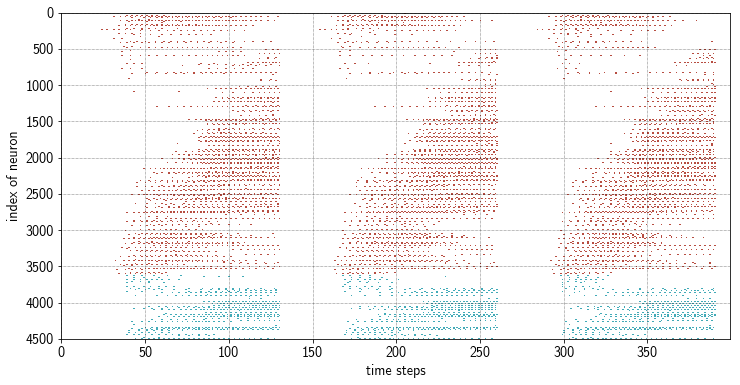

In [7]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(fr=0, to=400, figsize=(12,6))

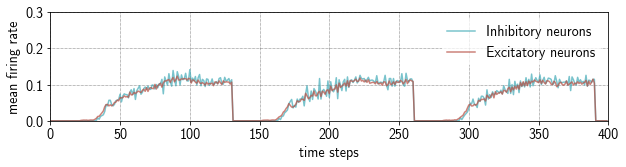

In [8]:
# Plot firing rates of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirRates(fr=0, to=400, ylim=(0.0,0.3), figsize=(10,2))

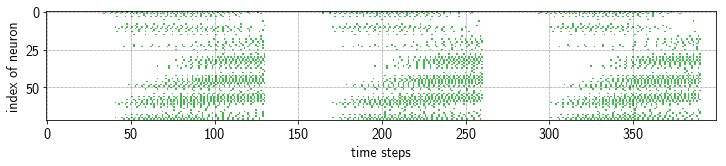

In [9]:
# Plot spike trains of the pool neurons
exp.net.plot.outputSpikeTrain(fr=0, to=400, color=exp.p.pltColor3, figsize=(12,2))

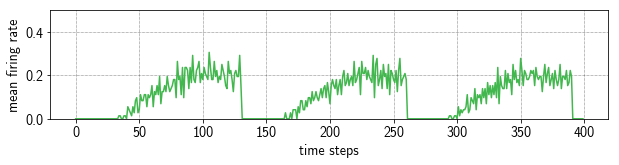

In [10]:
# Plot firing rates of the pool neurons
exp.net.plot.outputRates(fr=0, to=400, color=exp.p.pltColor3, ylim=(0,0.5), figsize=(10,2))

In [11]:
# Get spike data from excitatory neurons and pool neurons
dataEx = exp.net.condenseSpikeProbes(exp.net.exSpikeTrains)
dataOut = exp.net.condenseSpikeProbes(exp.net.outSpikeTrains)

# Define target
target = np.sin(np.arange(0,2,0.02))

In [12]:
# Prepare excitatory spiking data
(x, xe, y) = utils.prepareDataset(dataEx, target, binSize=10)

In [13]:
# Estimate parameters based all but last trial and predict target based on last trial
# Apply elastic net estimation approach to reduce parameters
predEx = utils.estimateMovement(x, xe, y, alpha=0.001, L1_wt=0.05)

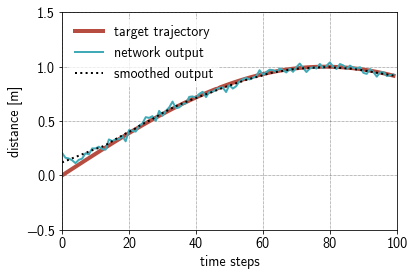

In [14]:
# Plot target, prediction and smoothed prediction
exp.net.plot.movement1D(predEx, target, legend=True, suffix='reservoir', ylim=(-0.5,1.5), precision=2)

In [15]:
# Prepare pool spiking data
(x, xe, y) = utils.prepareDataset(dataOut, target, binSize=10)

In [16]:
# Estimate parameters based all but last trial and predict target based on last trial
predPool = utils.estimateMovement(x, xe, y)

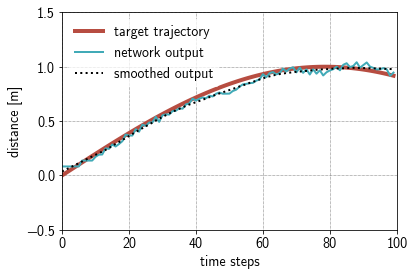

In [17]:
# Plot target, prediction and smoothed prediction
exp.net.plot.movement1D(predPool, target, legend=True, suffix='pooling', ylim=(-0.5,1.5), precision=2)